In [228]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import networkx as nx
import plotly.graph_objects as go
from wordcloud import WordCloud
from matplotlib_venn import venn3
sns.set(style="whitegrid")

### Uncomment below to download additional libraries

In [1]:
# %pip install wordcloud
# %pip install matplotlib_venn
# %pip install networkx 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Story 1
## Airbnb 

In [171]:
df=pd.read_csv("1_OneNum.csv")
df=df[df['price']<300]
df

,price
0,75.0
1,104.0
4,92.0
5,64.0
6,265.0
...,...
9990,97.0
9991,58.0
9992,127.0
9993,143.0


### Histogram

Text(0, 0.5, 'Count')

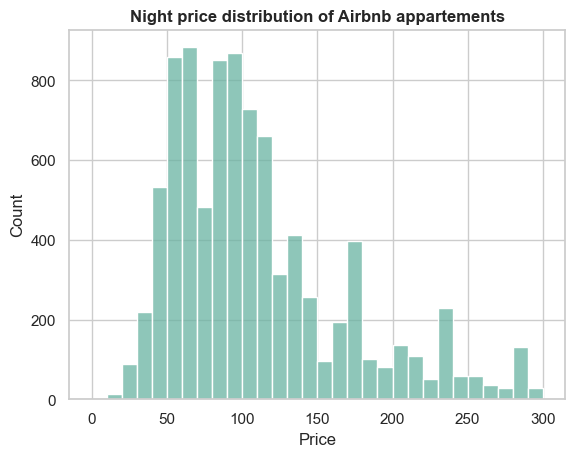

In [172]:
fig,ax=plt.subplots()
sns.histplot(data=df,x='price',bins=np.arange(0,301,10), color="#69b3a2")
ax.set_title("Night price distribution of Airbnb appartements",fontdict={'weight':'bold'})
ax.set_xlabel("Price",fontdict={'size':12})
ax.set_ylabel("Count",fontdict={'size':12})

<Figure size 1500x1000 with 0 Axes>

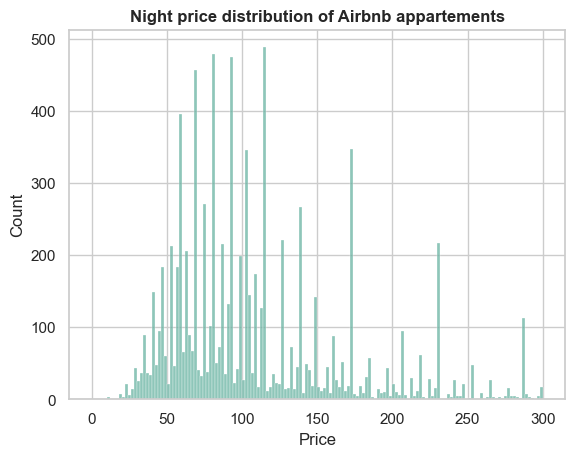

<Figure size 1500x1000 with 0 Axes>

In [173]:
fig,ax=plt.subplots()
sns.histplot(data=df,x='price',bins=np.arange(0,301,2), color="#69b3a2")
ax.set_title("Night price distribution of Airbnb appartements",fontdict={'weight':'bold'})
ax.set_xlabel("Price",fontdict={'size':12})
ax.set_ylabel("Count",fontdict={'size':12})
plt.figure(figsize=(15,10))

### Density Plot

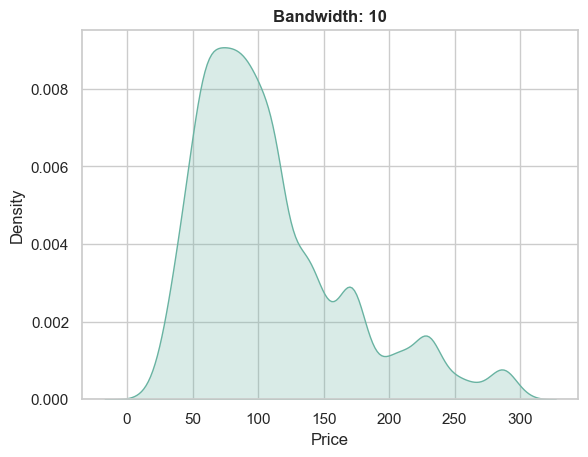

In [174]:
fig, ax = plt.subplots()
sns.kdeplot(x='price', data=df, color='#69b3a2', bw_adjust=1,fill=True)
ax.set_xlabel("Price", fontdict={'size': 12})
ax.set_title("Bandwidth: 10", fontdict={'weight': 'bold'})
ax.set_ylabel("Density", fontdict={'size': 12})
# ax.set_xlim(-500,2500)
# Show the plot
plt.show()

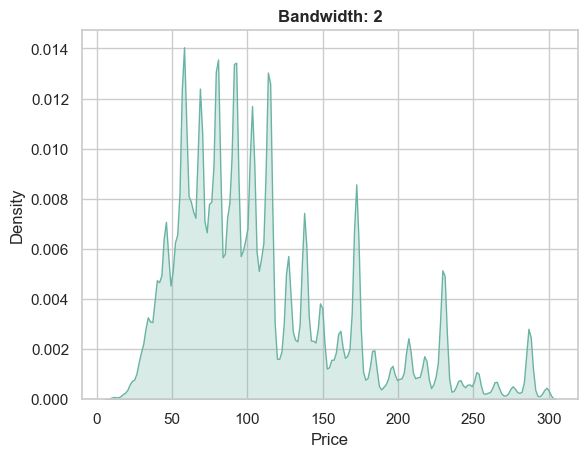

In [175]:
fig, ax = plt.subplots()
sns.kdeplot(x='price', data=df, color='#69b3a2', bw_adjust=0.2,fill=True)
ax.set_xlabel("Price", fontdict={'size': 12})
ax.set_title("Bandwidth: 2", fontdict={'weight': 'bold'})
ax.set_ylabel("Density", fontdict={'size': 12})
# Show the plot
plt.show()

# Story 2
## APARTMENT PRICE VS GROUND LIVING AREA.



In [176]:
df_story2=pd.read_csv("2_TwoNum.csv")
df_story2['SalePrice']=df_story2['SalePrice']/1000
df_story2

,GrLivArea,SalePrice
0,1710,208.500
1,1262,181.500
2,1786,223.500
3,1717,140.000
4,2198,250.000
...,...,...
1455,1647,175.000
1456,2073,210.000
1457,2340,266.500
1458,1078,142.125


Text(0, 0.5, 'Count')

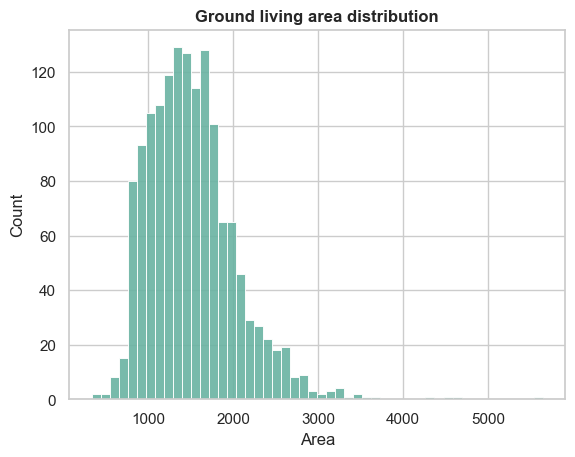

In [177]:
fig,ax=plt.subplots()
sns.histplot(data=df_story2,x='GrLivArea',bins=50,alpha=0.9, color="#69b3a2")
ax.set_title("Ground living area distribution",fontdict={'weight':'bold'})
ax.set_xlabel("Area",fontdict={'size':12})
ax.set_ylabel("Count",fontdict={'size':12})

Text(0, 0.5, 'Count')

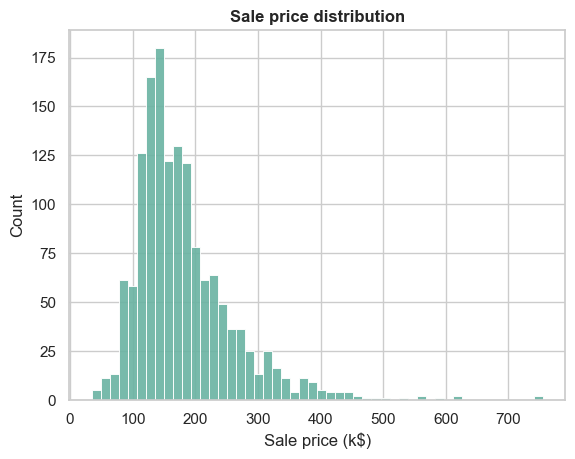

In [178]:
fig,ax=plt.subplots()
sns.histplot(data=df_story2,x='SalePrice',bins=50,alpha=0.9, color="#69b3a2")
ax.set_title("Sale price distribution",fontdict={'weight':'bold'})
ax.set_xlabel("Sale price (k$)",fontdict={'size':12})
ax.set_ylabel("Count",fontdict={'size':12})

Text(0, 0.5, 'Ground living area')

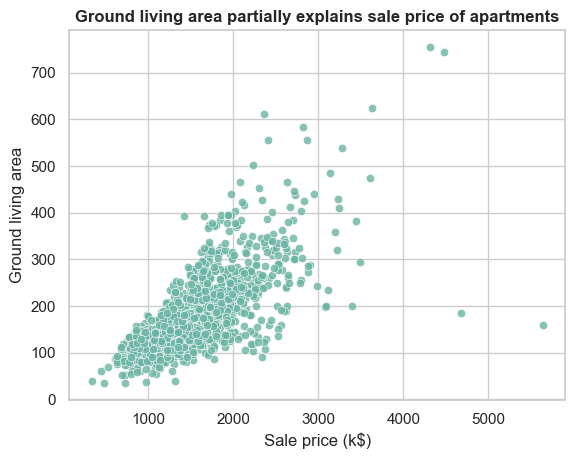

In [179]:
fig,ax=plt.subplots()
sns.scatterplot(data=df_story2,x='GrLivArea',y='SalePrice',color='#69b3a2',alpha=0.8)
ax.set_title("Ground living area partially explains sale price of apartments",fontdict={'weight':'bold'})
ax.set_xlabel("Sale price (k$)",fontdict={'size':12})
ax.set_ylabel("Ground living area",fontdict={'size':12})

Text(0.5, 0, 'Ground living area')

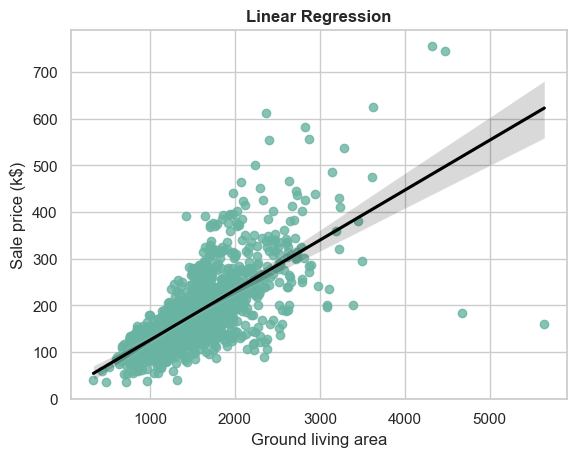

In [180]:
fig,ax=plt.subplots()
sns.regplot(data=df_story2,x='GrLivArea',y='SalePrice',scatter_kws = {"color": "#69b3a2", "alpha": 0.8},line_kws = {"color": "black"})
ax.set_title("Linear Regression",fontdict={'weight':'bold'})
ax.set_ylabel("Sale price (k$)",fontdict={'size':12})
ax.set_xlabel("Ground living area",fontdict={'size':12})

Text(0.5, 0, 'Ground living area')

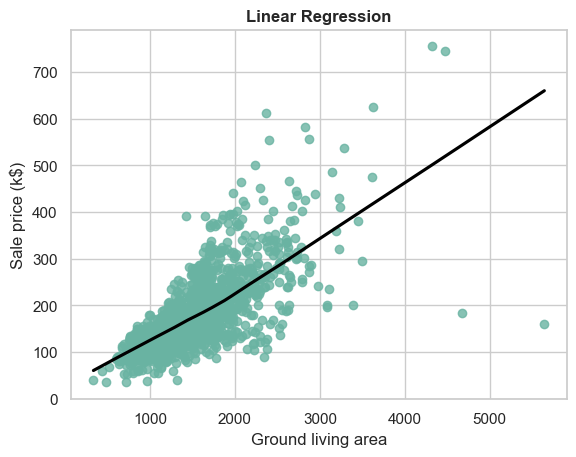

In [181]:
fig,ax=plt.subplots()
sns.regplot(data=df_story2,x='GrLivArea',y='SalePrice',scatter_kws = {"color": "#69b3a2", "alpha": 0.8},line_kws = {"color": "black"},lowess=True)
ax.set_title("Linear Regression",fontdict={'weight':'bold'})
ax.set_ylabel("Sale price (k$)",fontdict={'size':12})
ax.set_xlabel("Ground living area",fontdict={'size':12})

Text(0, 0.5, 'Ground living area')

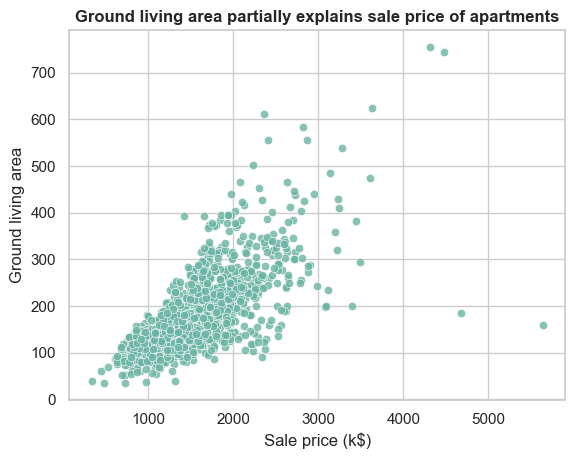

In [182]:
fig,ax=plt.subplots()
sns.scatterplot(data=df_story2,x='GrLivArea',y='SalePrice',color='#69b3a2',alpha=0.8)
ax.set_title("Ground living area partially explains sale price of apartments",fontdict={'weight':'bold'})
ax.set_xlabel("Sale price (k$)",fontdict={'size':12})
ax.set_ylabel("Ground living area",fontdict={'size':12})

Interactive Plot

In [183]:
fig = px.density_contour(df_story2, x='GrLivArea', y='SalePrice', labels={'GrLivArea': 'Ground living area', 'SalePrice': 'Sale price (k$)'})
fig.update_layout(title='Density 2D Plot with Contours')
fig.show()

Marginal Distribution

In [184]:
df_story2['SalePrice']=df_story2['SalePrice']*1000

Text(0.5, 0, 'Ground living area')

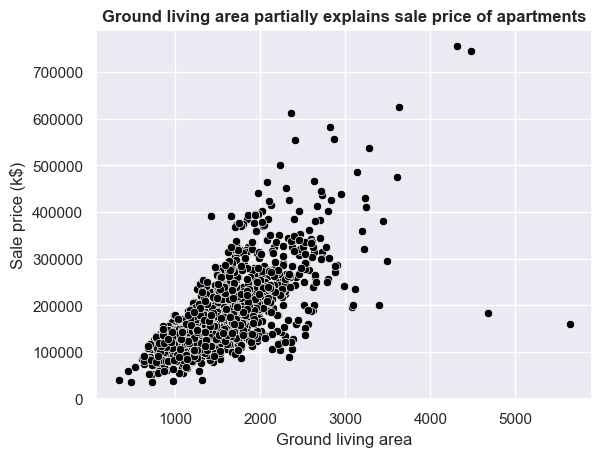

In [185]:
sns.set(style='darkgrid')
fig,ax=plt.subplots()
sns.scatterplot(data=df_story2,x='GrLivArea',y='SalePrice',color='#000000')
ax.set_title("Ground living area partially explains sale price of apartments",fontdict={'weight':'bold'})
ax.set_ylabel("Sale price (k$)",fontdict={'size':12})
ax.set_xlabel("Ground living area",fontdict={'size':12})

In [186]:
df_story2['SalePrice']=df_story2['SalePrice']/1000

### Overplotting

Text(0, 0.5, 'Ground living area')

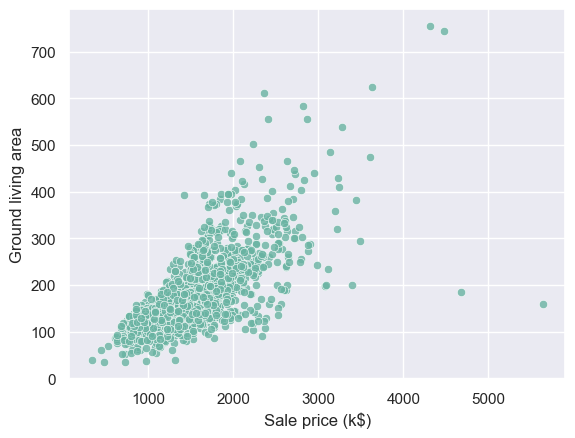

In [187]:
fig,ax=plt.subplots()
sns.scatterplot(data=df_story2,x='GrLivArea',y='SalePrice',color='#69b3a2',alpha=0.8)
ax.set_xlabel("Sale price (k$)",fontdict={'size':12})
ax.set_ylabel("Ground living area",fontdict={'size':12})

(0.0, 500.0)

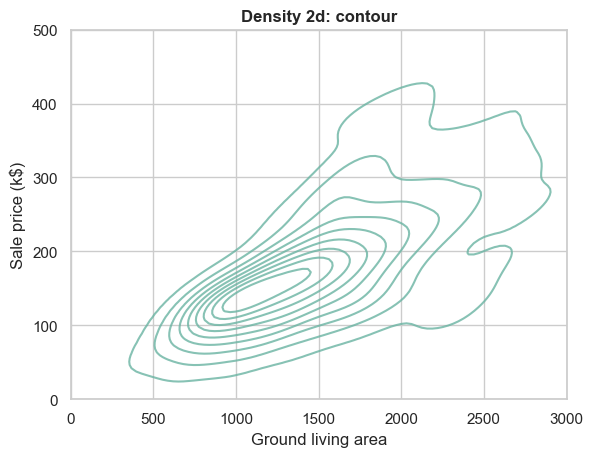

In [188]:
sns.set(style='whitegrid')
fig,ax=plt.subplots()
sns.kdeplot(df_story2,x='GrLivArea',y='SalePrice',color='#69b3a2',alpha=0.8)
ax.set_title("Density 2d: contour",fontdict={'weight':'bold'})
ax.set_ylabel("Sale price (k$)",fontdict={'size':12})
ax.set_xlabel("Ground living area",fontdict={'size':12})
ax.set_xlim(0,3001)
ax.set_ylim(0,500)

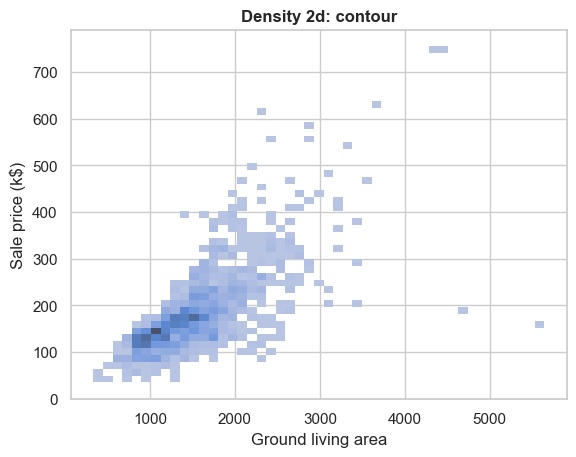

In [189]:
fig,ax=plt.subplots()
plot=sns.histplot(df_story2,x='GrLivArea',y='SalePrice',ax=ax)
ax.set_title("Density 2d: contour",fontdict={'weight':'bold'})
ax.set_ylabel("Sale price (k$)",fontdict={'size':12})
ax.set_xlabel("Ground living area",fontdict={'size':12})
plt.show()

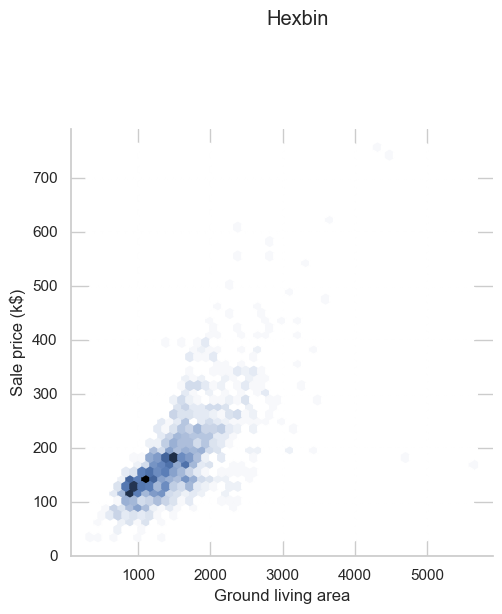

In [190]:
plot = sns.jointplot(data=df_story2, x='GrLivArea', y='SalePrice', kind='hex')
plot.fig.suptitle('Hexbin', y=1.02)
plot.set_axis_labels(xlabel='Ground living area', ylabel='Sale price (k$)')
plot.ax_marg_x.remove()
plot.ax_marg_y.remove()
plt.show()

(0.0, 500.0)

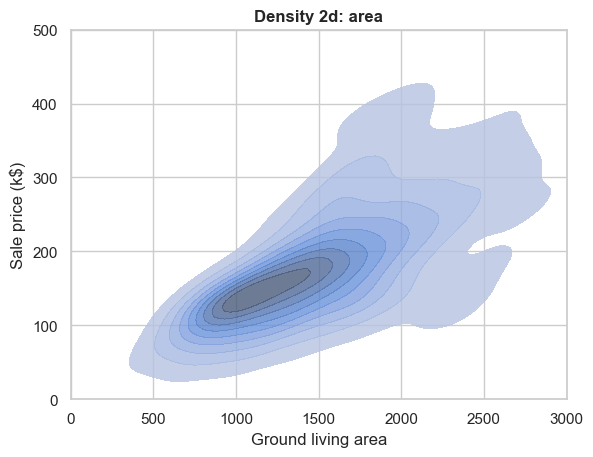

In [191]:
sns.set(style='whitegrid')
fig,ax=plt.subplots()
sns.kdeplot(df_story2,x='GrLivArea',y='SalePrice',alpha=0.8,fill=True)
ax.set_title("Density 2d: area",fontdict={'weight':'bold'})
ax.set_ylabel("Sale price (k$)",fontdict={'size':12})
ax.set_xlabel("Ground living area",fontdict={'size':12})
ax.set_xlim(0,3001)
ax.set_ylim(0,500)

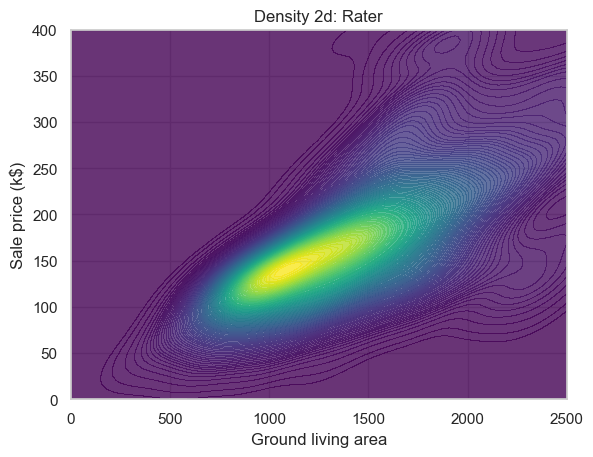

In [192]:
sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.kdeplot(data=df_story2, x='GrLivArea', y='SalePrice', fill=True, color='blue',cmap='viridis', levels=100, thresh=0, alpha=0.8)
ax.set_title("Density 2d: Rater")
ax.set_ylabel("Sale price (k$)")
ax.set_xlabel("Ground living area")
ax.set_xlim(0,2500)
ax.set_ylim(0,400)
plt.show()

# Story 3
## Bitcoin Price Plot

In [193]:
df_story3=pd.read_csv("3_TwoNumOrdered_comma.csv")
df_story3

,date,value
0,2013-04-28,135.98
1,2013-04-29,147.49
2,2013-04-30,146.93
3,2013-05-01,139.89
4,2013-05-02,125.60
...,...,...
1817,2018-04-19,8298.69
1818,2018-04-20,8880.23
1819,2018-04-21,8997.57
1820,2018-04-22,9001.64


In [194]:
df_story3['date']=pd.to_datetime(df_story3['date'])
df_story3.dtypes

date     datetime64[ns]
value           float64
dtype: object

Text(0.5, 0, 'date')

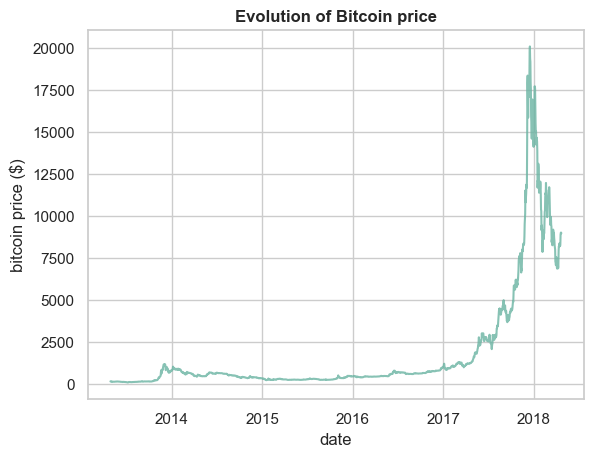

In [195]:
sns.set(style='whitegrid')
fig,ax=plt.subplots()
sns.lineplot(data=df_story3,x='date',y='value',color='#69b3a2',alpha=0.8)
ax.set_title("Evolution of Bitcoin price",fontdict={'weight':'bold'})
ax.set_ylabel("bitcoin price ($)",fontdict={'size':12})
ax.set_xlabel("date",fontdict={'size':12})

Text(0.5, 0, 'date')

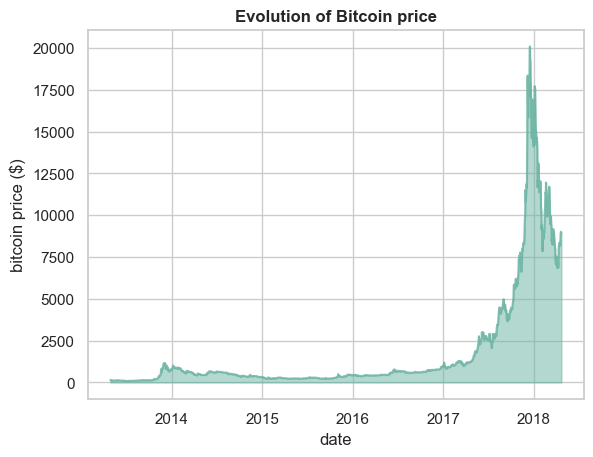

In [196]:
fig,ax=plt.subplots()
sns.lineplot(data=df_story3,x='date',y='value',color='#69b3a2',alpha=0.8)
ax.fill_between(df_story3['date'],df_story3['value'], color='#69b3a2', alpha=0.5, label='Area under the curve')
ax.set_title("Evolution of Bitcoin price",fontdict={'weight':'bold'})
ax.set_ylabel("bitcoin price ($)",fontdict={'size':12})
ax.set_xlabel("date",fontdict={'size':12})

Text(0.5, 0, 'date')

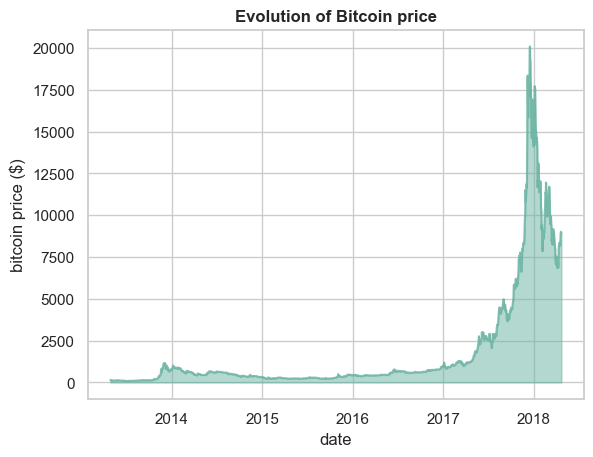

In [197]:
fig,ax=plt.subplots()
sns.lineplot(data=df_story3,x='date',y='value',color='#69b3a2',alpha=0.8)
ax.fill_between(df_story3['date'],df_story3['value'], color='#69b3a2', alpha=0.5, label='Area under the curve')
ax.set_title("Evolution of Bitcoin price",fontdict={'weight':'bold'})
ax.set_ylabel("bitcoin price ($)",fontdict={'size':12})
ax.set_xlabel("date",fontdict={'size':12})

Text(0.5, 0, 'date')

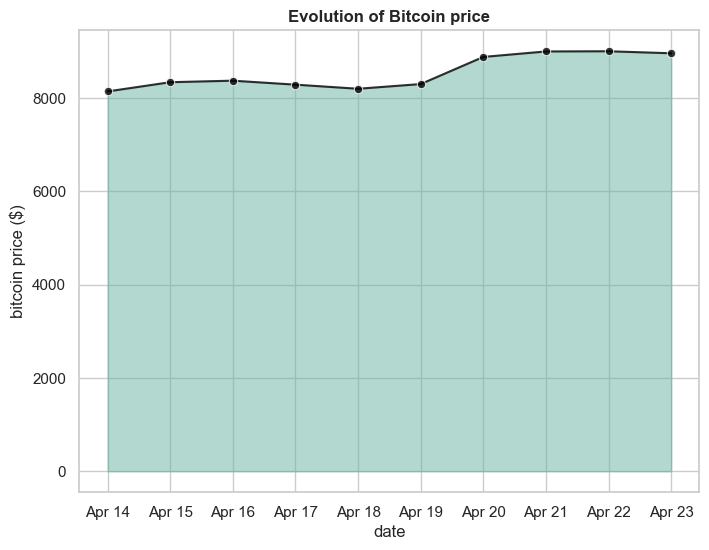

In [198]:
last_10=df_story3.tail(10)
fig,ax=plt.subplots(figsize=(8,6))
li=["Apr 14","Apr 15","Apr 16","Apr 17","Apr 18","Apr 19","Apr 20","Apr 21","Apr 22","Apr 23"]
last_10['date']=li
sns.lineplot(data=last_10,x='date',y='value',color='black',alpha=0.8,marker='o')
ax.fill_between(last_10['date'],last_10['value'], color='#69b3a2', alpha=0.5, label='Area under the curve')
ax.set_title("Evolution of Bitcoin price",fontdict={'weight':'bold'})
ax.set_ylabel("bitcoin price ($)",fontdict={'size':12})
ax.set_xlabel("date",fontdict={'size':12})

(7500.0, 10000.0)

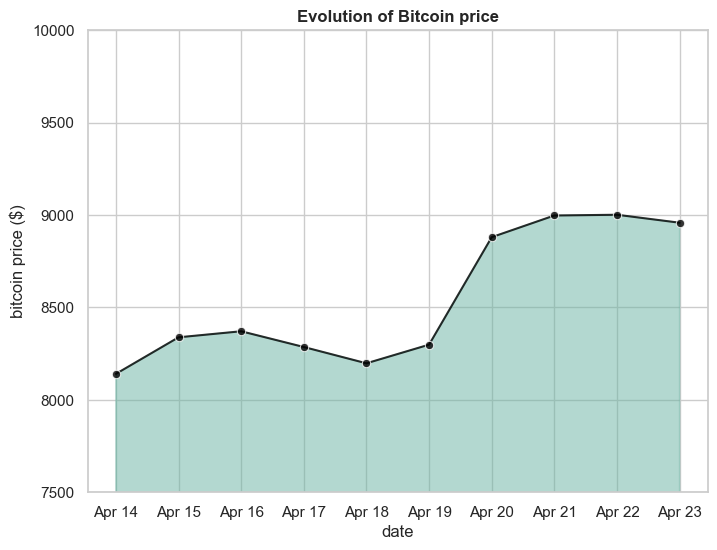

In [199]:
fig,ax=plt.subplots(figsize=(8,6))
sns.lineplot(data=last_10,x='date',y='value',color='black',alpha=0.8,marker='o')
ax.fill_between(last_10['date'],last_10['value'], color='#69b3a2', alpha=0.5, label='Area under the curve')
ax.set_title("Evolution of Bitcoin price",fontdict={'weight':'bold'})
ax.set_ylabel("bitcoin price ($)",fontdict={'size':12})
ax.set_xlabel("date",fontdict={'size':12})
ax.set_ylim(7500,10000)

Text(0.5, 0, 'date')

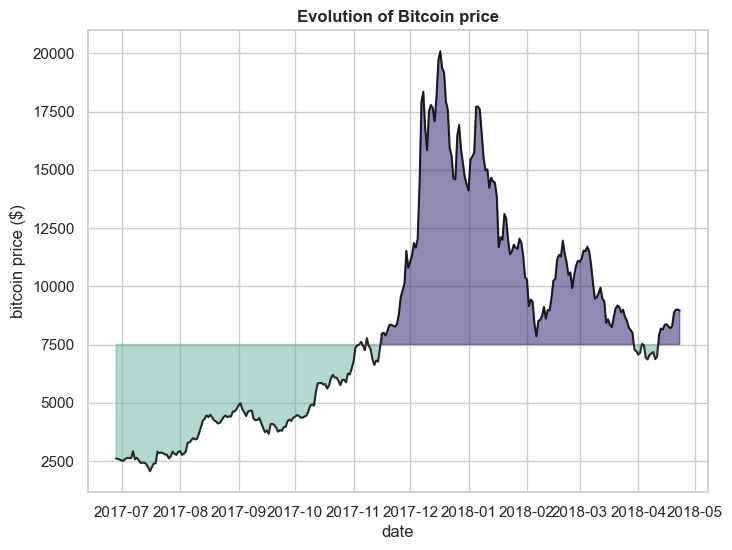

In [200]:
last_300=df_story3.tail(300)
fig,ax=plt.subplots(figsize=(8,6))
sns.lineplot(data=last_300,x='date',y='value',color='black',alpha=0.8)
threshold=7500
ax.fill_between(last_300['date'],last_300['value'], threshold,where=(last_300['value']<threshold),color='#69b3a2', alpha=0.5, label='Area under the curve')
ax.fill_between(last_300['date'],last_300['value'], threshold,where=(last_300['value']>=threshold),color='#271569', alpha=0.5, label='Area under the curve')
ax.set_title("Evolution of Bitcoin price",fontdict={'weight':'bold'})
ax.set_ylabel("bitcoin price ($)",fontdict={'size':12})
ax.set_xlabel("date",fontdict={'size':12})

# Story 4

In [201]:
df_story4=pd.read_csv("4_ThreeNum.csv")
df_story4

,country,continent,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,43.828,31889923,974.580338
1,Albania,Europe,76.423,3600523,5937.029526
2,Algeria,Africa,72.301,33333216,6223.367465
3,Angola,Africa,42.731,12420476,4797.231267
4,Argentina,Americas,75.320,40301927,12779.379640
...,...,...,...,...,...
137,Vietnam,Asia,74.249,85262356,2441.576404
138,West Bank and Gaza,Asia,73.422,4018332,3025.349798
139,"Yemen, Rep.",Asia,62.698,22211743,2280.769906
140,Zambia,Africa,42.384,11746035,1271.211593


In [202]:
df_story4['pop']=df_story4['pop']/1000000
df_story4

,country,continent,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,43.828,31.889923,974.580338
1,Albania,Europe,76.423,3.600523,5937.029526
2,Algeria,Africa,72.301,33.333216,6223.367465
3,Angola,Africa,42.731,12.420476,4797.231267
4,Argentina,Americas,75.320,40.301927,12779.379640
...,...,...,...,...,...
137,Vietnam,Asia,74.249,85.262356,2441.576404
138,West Bank and Gaza,Asia,73.422,4.018332,3025.349798
139,"Yemen, Rep.",Asia,62.698,22.211743,2280.769906
140,Zambia,Africa,42.384,11.746035,1271.211593


<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

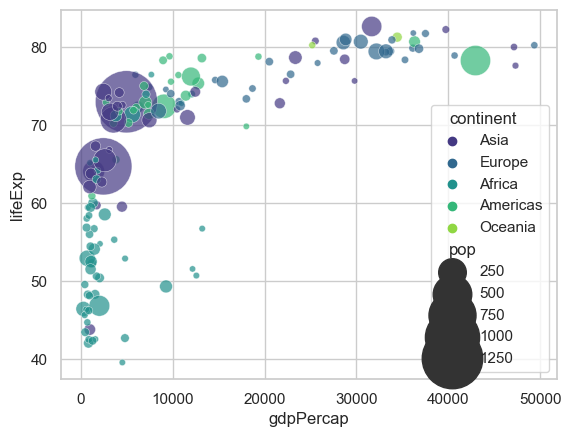

In [203]:
sns.scatterplot(data=df_story4,x="gdpPercap",y="lifeExp",size="pop",hue="continent",sizes=(20,2000),alpha=0.7,palette='viridis')

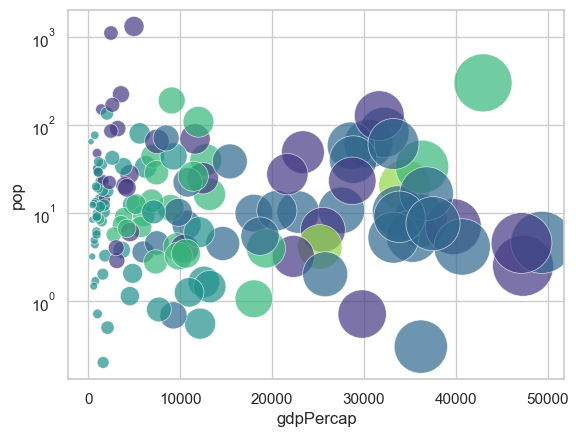

In [204]:
plot=sns.scatterplot(data=df_story4,x="gdpPercap",y="pop",size="gdpPercap",hue="continent",sizes=(20,2000),alpha=0.7,palette='viridis',legend=False)
plot.set_yscale("log")

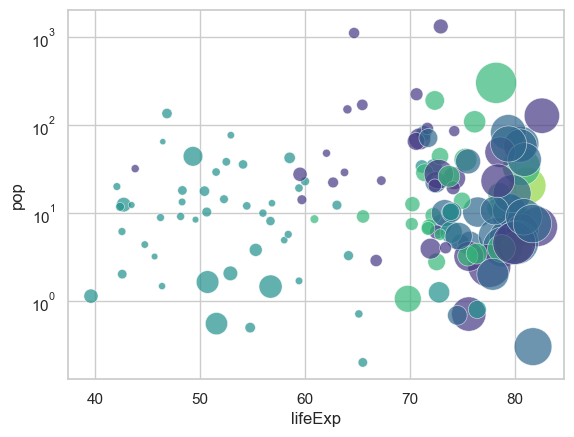

In [205]:
plot=sns.scatterplot(data=df_story4,x="lifeExp",y="pop",size="gdpPercap",hue="continent",sizes=(20,1000),alpha=0.7,palette='viridis',legend=False)
plot.set_yscale("log")

# Story 5
## 

In [206]:
df_story5=pd.read_csv("5_OneCatSevNumOrdered.csv")
df_story5

,year,sex,name,n,prop
0,1880,F,Helen,636,0.006516
1,1880,F,Amanda,241,0.002469
2,1880,F,Betty,117,0.001199
3,1880,F,Dorothy,112,0.001147
4,1880,F,Linda,27,0.000277
...,...,...,...,...,...
1156,2015,F,Linda,423,0.000219
1157,2015,F,Dorothy,395,0.000204
1158,2015,F,Deborah,346,0.000179
1159,2015,F,Patricia,346,0.000179


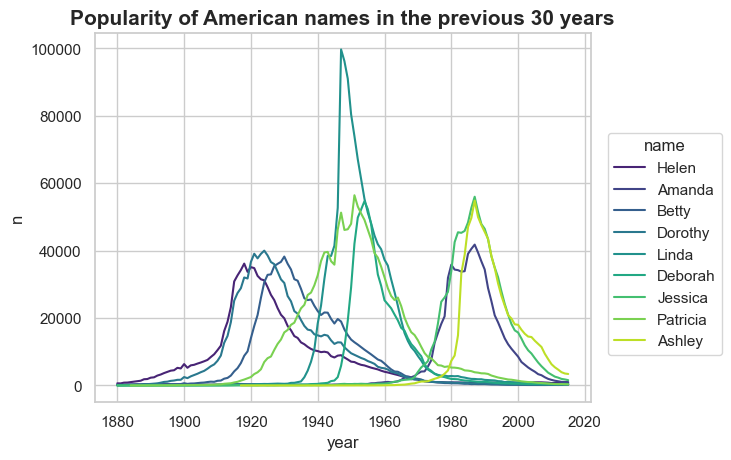

In [207]:
plot=sns.lineplot(data=df_story5,x="year",y="n",hue='name',palette='viridis')
plot.set_title("Popularity of American names in the previous 30 years",fontdict={'weight':"bold",'size':15})
plt.legend(bbox_to_anchor=(1.02, 0.75), loc='upper left',title='name')

# Story 6
#

In [208]:
df_story6=pd.read_csv("6_SeveralNum.csv")
df_story6

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


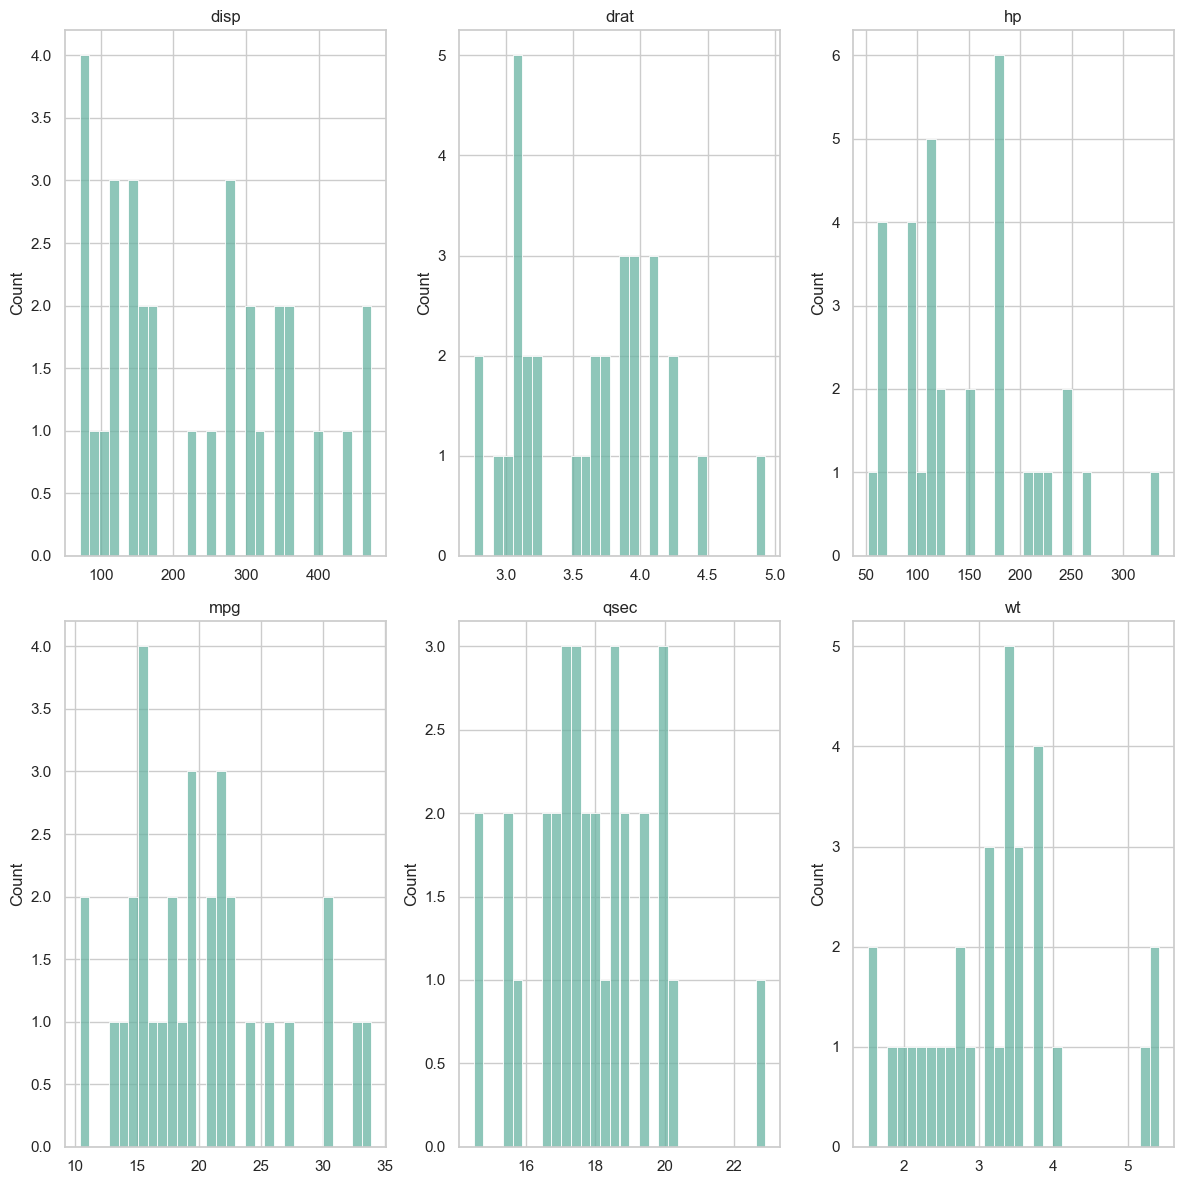

In [209]:
features = ["disp", "drat", "hp", "mpg", "qsec", "wt"]
fig, axs = plt.subplots(2, 3, figsize=(12, 12), tight_layout=False)
for i, j in enumerate(features):
    plot=sns.histplot(data=df_story6, x=j,bins=30, ax=axs[i //3,i % 3],color="#69b3a2")
    plot.set_xlabel("")
    plot.set_title(f"{j}")
plt.show()

### Dendogram

In [210]:
X=df_story6.drop(['Unnamed: 0'],axis=1)
Y=df_story6['Unnamed: 0'].values
fig = ff.create_dendrogram(X.values,labels=Y,orientation='right')
fig.update_layout(width=800, height=800)
fig.show()


### Dendogram Heatmap

In [211]:
X=X.drop(['carb','am','vs','gear','cyl'],axis=1)

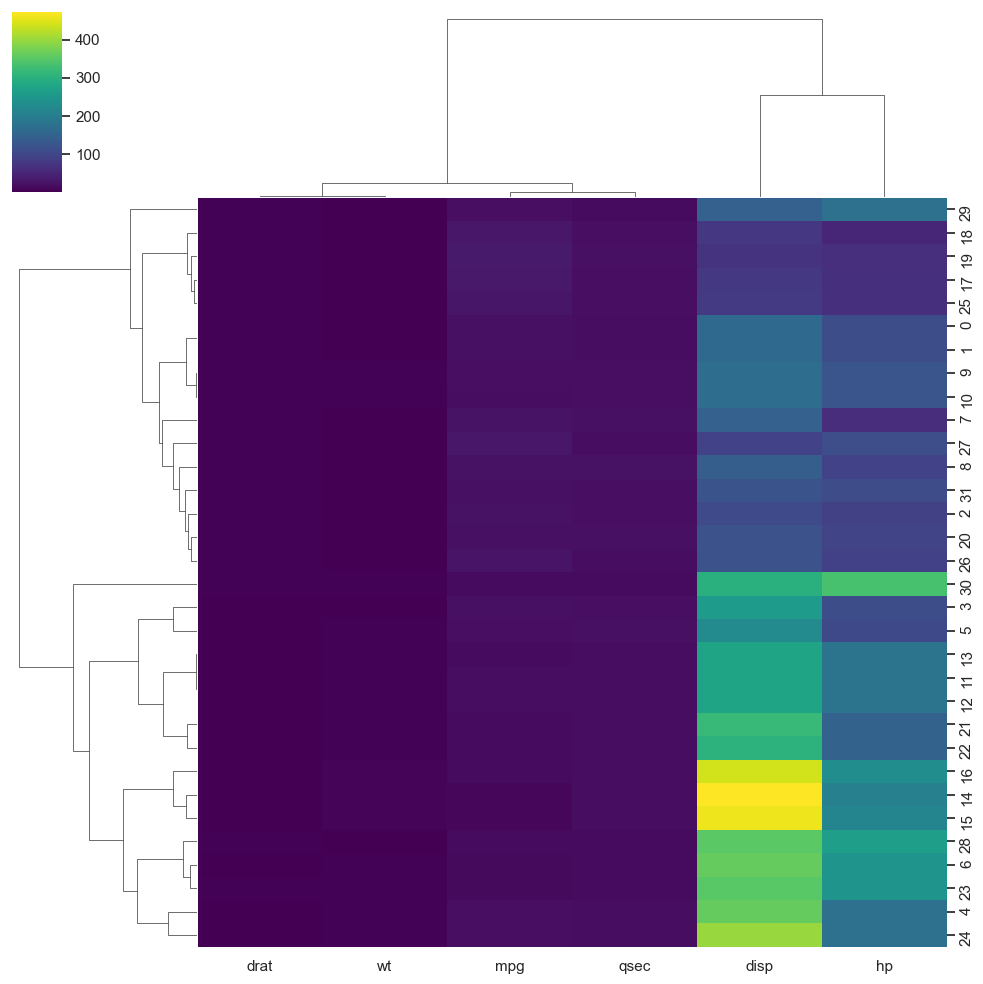

In [212]:
sns.clustermap(X, cmap="viridis",row_cluster=True,col_cluster=True)

# Story 7

In [213]:
df_story7=pd.read_csv("7_OneCatOneNum.csv")
df_story7=df_story7.fillna(0)

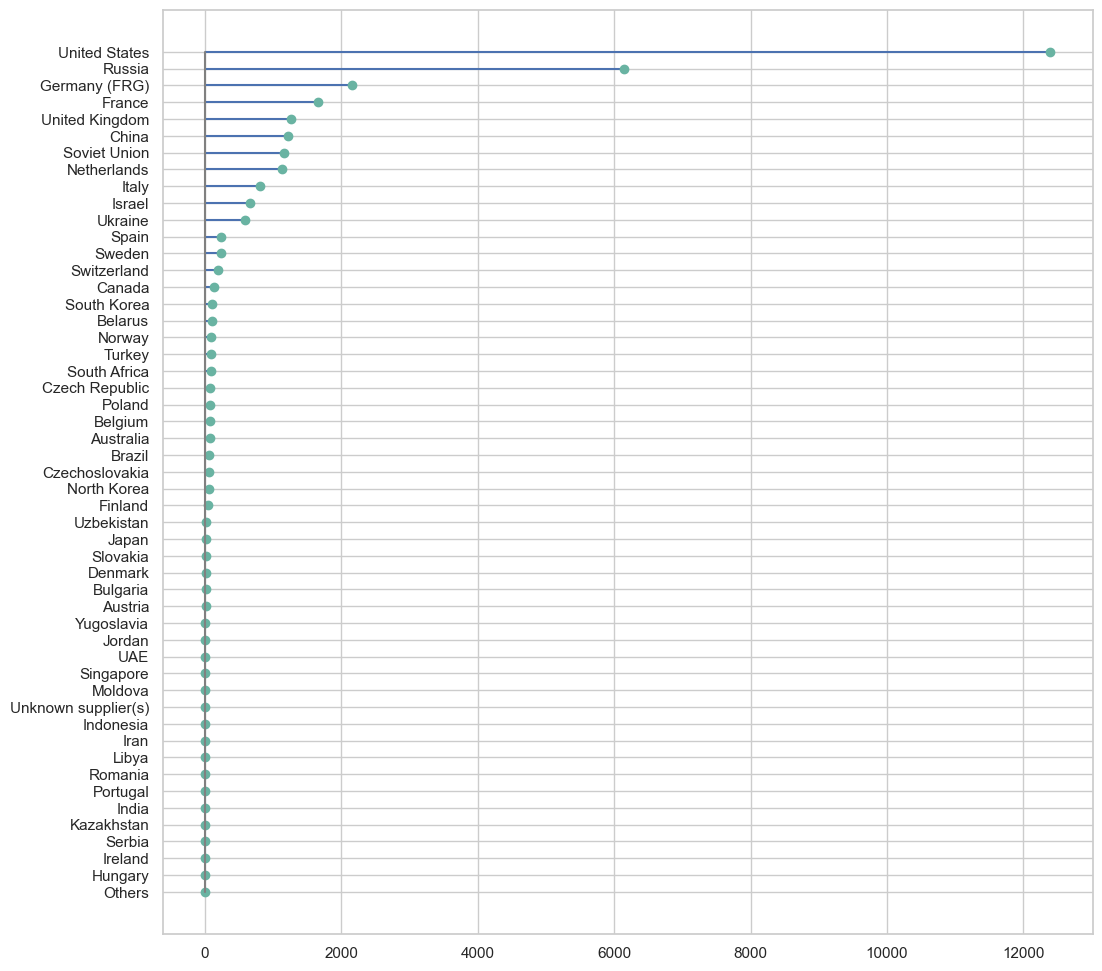

In [214]:
ordered_df=df_story7.sort_values(by='Value')
my_range=range(0,len(df_story7.index))
plt.figure(figsize=(12,12))
plt.stem(ordered_df['Value'],orientation="horizontal",markerfmt="#69b3a2",basefmt="grey")
plt.yticks(my_range,df_story7['Country'][::-1])
plt.show()

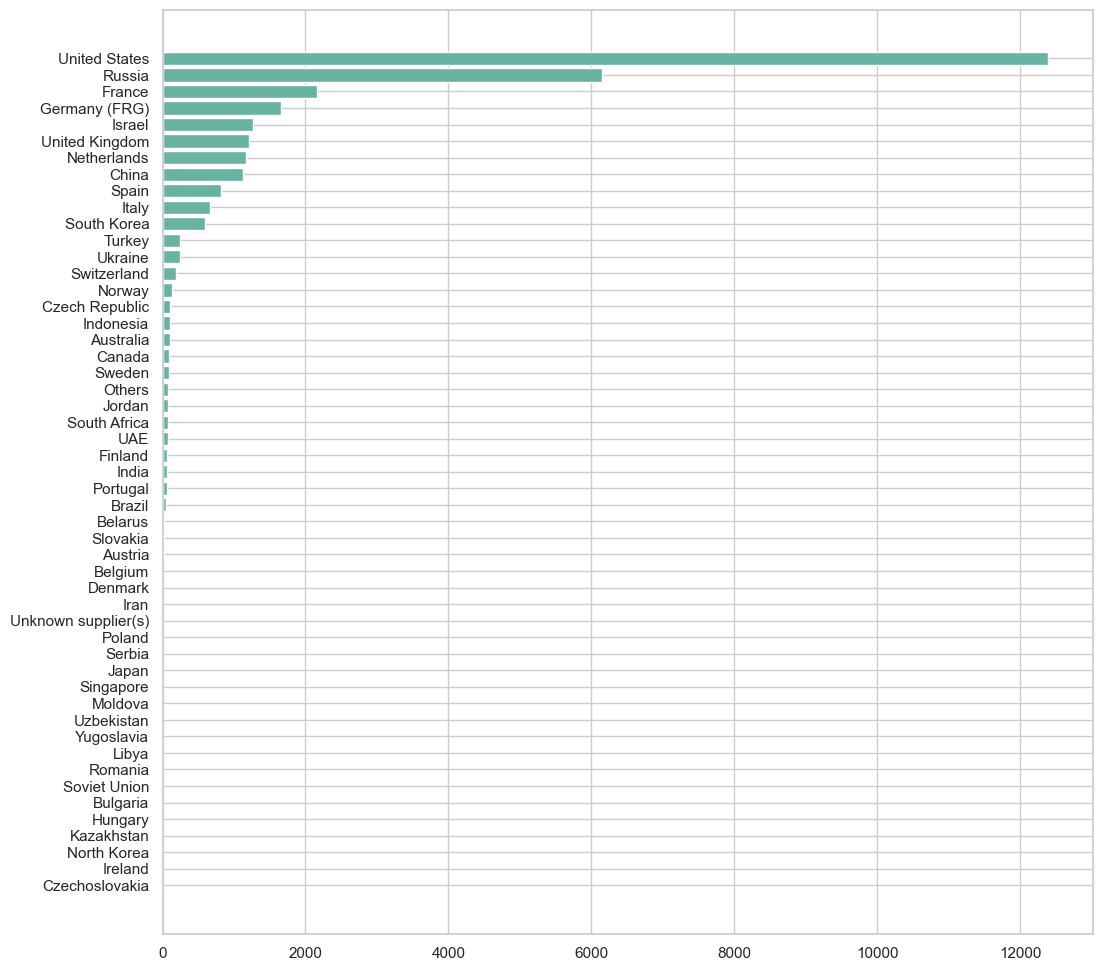

In [215]:
plt.figure(figsize=(12,12))
plt.barh(ordered_df['Country'],ordered_df['Value'],color="#69b3a2",orientation="horizontal")
plt.show()

In [216]:
ordered_df2=ordered_df.copy()
ordered_df2['Value'] = ordered_df2['Value'].replace([0.0], -200.0)

### Circular Barplot

In [217]:
def get_label_rotation(angle, offset):
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

def add_labels(angles, values, labels, offset, ax):
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        rotation, alignment = get_label_rotation(angle, offset)
        if(value<=0):
            continue
        ax.text(
            x=angle, 
            y=value+200+20, 
            s=label+f"({int(value)})", 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 


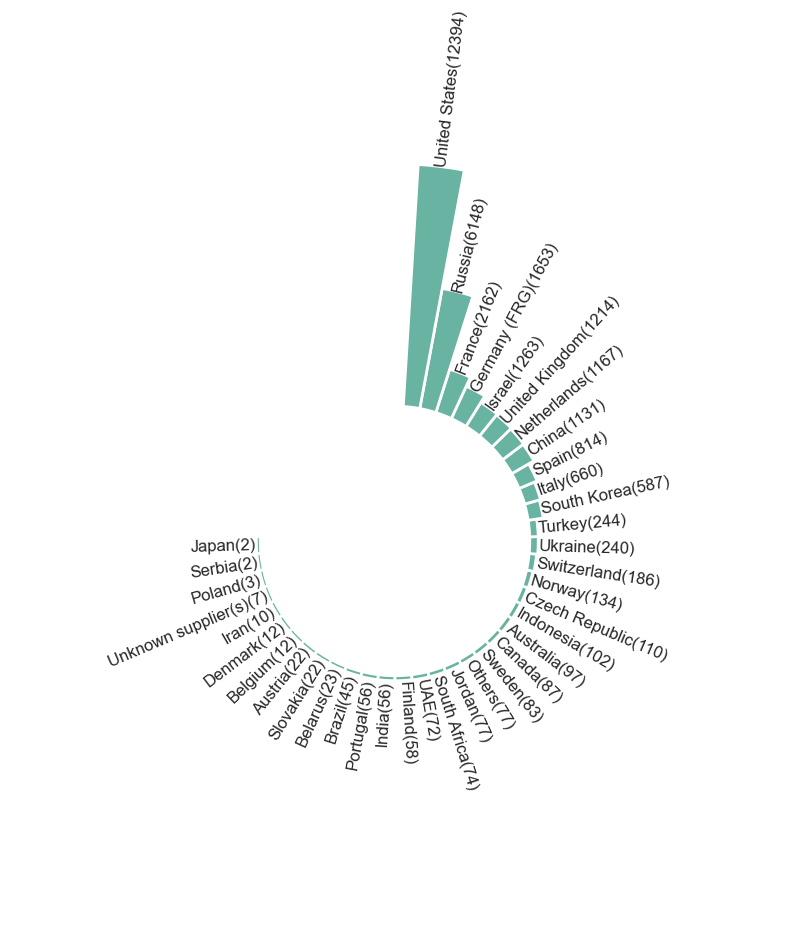

In [218]:
ANGLES = np.linspace(0, 2 * np.pi, len(ordered_df2), endpoint=False)
VALUES = ordered_df2["Value"].values
LABELS = ordered_df2["Country"].values
WIDTH = 2 * np.pi / len(VALUES)
OFFSET = np.pi / 2
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-7000, 13000)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.bar(
    ANGLES, VALUES+200.0, width=WIDTH, linewidth=2,
    color="#69b3a2", edgecolor="white"
)
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)


### Treemap

In [219]:
fig = px.treemap(df_story7, path=[ 'Country'], values='Value',hover_data=['Value'])
fig.show()

# Story 8

### Wordcloud

In [220]:
df_story8=pd.read_csv("14_SeveralIndepLists_corrected.csv")
df_story8

,artist,song,word
0,booba,113,paroles.net
1,booba,113,above
2,booba,113,lyrics
3,booba,113,function
4,booba,113,var
...,...,...,...
11524,nekfeu,squa,r.onreadystatechange
11525,nekfeu,squa,NaN
11526,nekfeu,squa,r.onload
11527,nekfeu,squa,s.parentnode.insertbefore


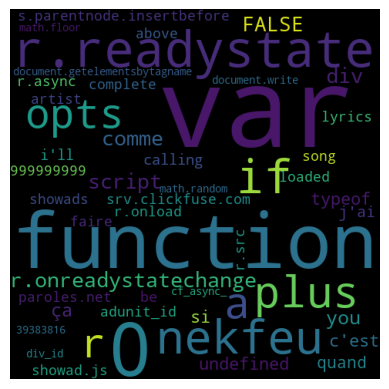

In [221]:
selected_artist = "nekfeu"
filtered_data = df_story8[df_story8['artist'] == selected_artist]
top_words = filtered_data['word'].value_counts().head(50)
wordcloud = WordCloud(width=480, height=480, margin=0).generate_from_frequencies(top_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

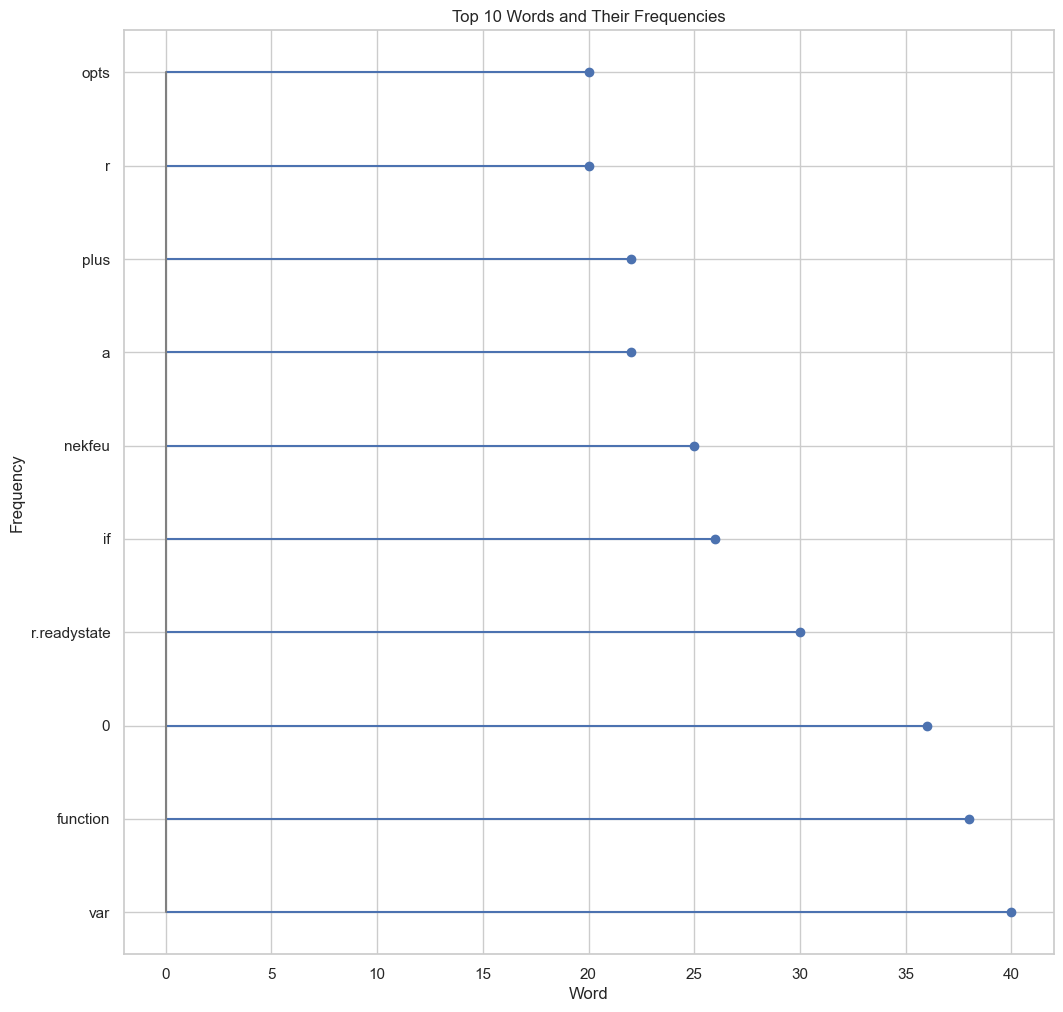

In [222]:
top_10_words = filtered_data['word'].value_counts()

data_try = pd.DataFrame({'Value': top_10_words.index, 'Frequency': top_10_words.values})


plt.figure(figsize=(12, 12))
plt.stem(top_10_words.head(10), markerfmt="o", linefmt="-", basefmt="grey", bottom=0,orientation="horizontal")
plt.yticks(range(0, 10), top_10_words.index[:10])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Words and Their Frequencies')
plt.show()


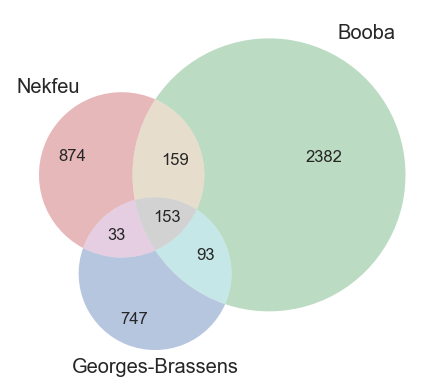

In [223]:
nekfeu=set(df_story8[df_story8['artist']=="nekfeu"]['word'])
booba=set(df_story8[df_story8['artist']=="booba"]['word'])
georges=set(df_story8[df_story8['artist']=="georges-brassens"]['word'])

labels={'100': 'Nekfeu', '010': 'Booba', '001': 'Georges Brassens', '110': 'Nekfeu and Booba',
               '101': 'Nekfeu and Georges Brassens', '011': 'Booba and Georges Brassens', '111': 'Nekfeu, Booba, and Georges Brassens'}
plot=venn3([nekfeu,booba,georges], set_labels=('Nekfeu', 'Booba', 'Georges-Brassens'))
plot.get_label_by_id('100').set_text(len(nekfeu))
plot.get_label_by_id('010').set_text(len(booba))
plot.get_label_by_id('001').set_text(len(georges))


# Story 9

### Grouped barplot

In [224]:
df_story9=pd.read_csv("9_OneNumSevCatSubgroupOneObs.csv")
df_story9

,Country,TIME,Value
0,Australia,2000,17.2
1,Australia,2005,15.8
2,Australia,2010,14.0
3,Australia,2015,13.0
4,Austria,2000,23.1
...,...,...,...
105,United Kingdom,2015,17.1
106,United States,2000,23.1
107,United States,2005,19.0
108,United States,2010,18.8


In [225]:
years = [2010, 2005, 2015, 2000]
valid_countries = df_story9.groupby('Country')['TIME'].nunique() == len(years)
valid_countries = valid_countries[valid_countries].index
df_selected_years = df_story9[(df_story9['Country'].isin(valid_countries)) & (df_story9['TIME'].isin(years))]
df_selected_years=df_selected_years.sort_values(by='Value',ascending=False)
df_selected_years

,Country,TIME,Value
62,Korea,2000,41.7
64,Korea,2010,39.6
63,Korea,2005,39.6
65,Korea,2015,37.2
58,Japan,2000,33.9
...,...,...,...
75,New Zealand,2010,7.0
10,Belgium,2010,7.0
44,Hungary,2010,6.4
11,Belgium,2015,4.7


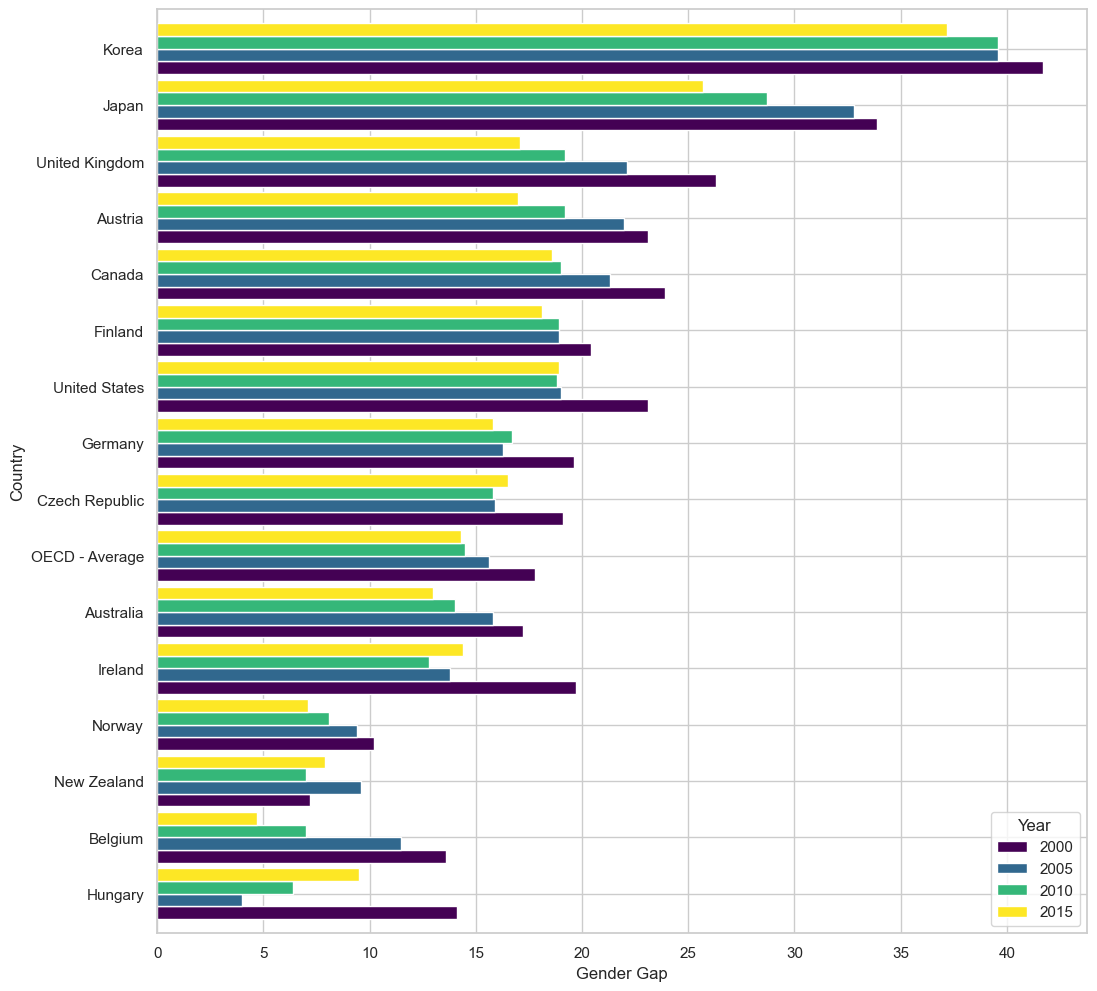

In [226]:
pivot_data = df_selected_years.pivot(index="Country", columns="TIME", values="Value")
pivot_data_sorted = pivot_data.sort_values(by=2010, ascending=True)
fig, ax = plt.subplots(figsize=(12, 12))
plu = pivot_data_sorted.plot(kind='barh', ax=ax,width=0.9,colormap='viridis')
plt.xlabel("Gender Gap")
plt.ylabel("Country")
plt.legend(title="Year")
plt.show()


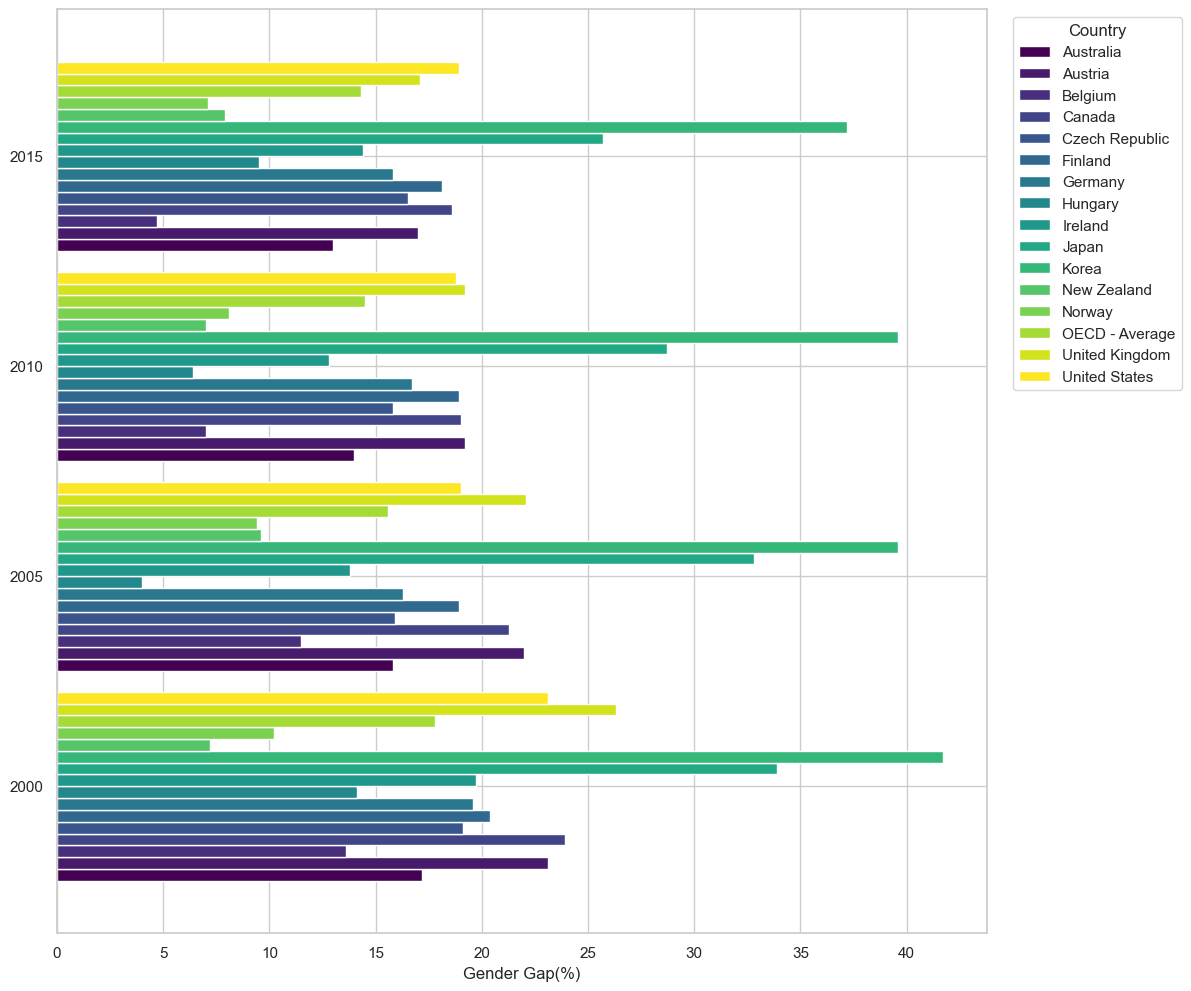

In [227]:
pivot_data = df_selected_years.pivot(index="TIME", columns="Country", values="Value")
fig, ax = plt.subplots(figsize=(12, 12))
plu = pivot_data.plot(kind='barh', ax=ax,width=0.9,colormap='viridis')
plt.xlabel("Gender Gap(%)")
plt.ylabel("")
plt.legend(title="Country", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()